# HOMEWORK 5

In this homework you are going to implement the **Floyd-Steinberg dithering** algorithm. Dithering, in general, means that we are adding noise to the signal (in our case digital image) in order to perceive it better. In other words, by adding the noise the objective quality will be worse but the subjective quality will be better (i.e. the image will "look" better).

The details of FS dithering can be found in this [wiki](https://en.wikipedia.org/wiki/Floyd%E2%80%93Steinberg_dithering) page. In order to implement the dithering, we will implement the following steps:
* Define colour pallette
* Quantize the image to obtain the baseline and compute the average quantization error
* Implement FS dithering and compute the average quantization error

You will also have to answer the question at the end of this notebook.

Note: In this homework, you will have the chance to earn some extra points. See the "Bonus" section at the end of the notebook. Good luck!

As always, you are encouraged to use your own images :-)

In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

Let's load the image.

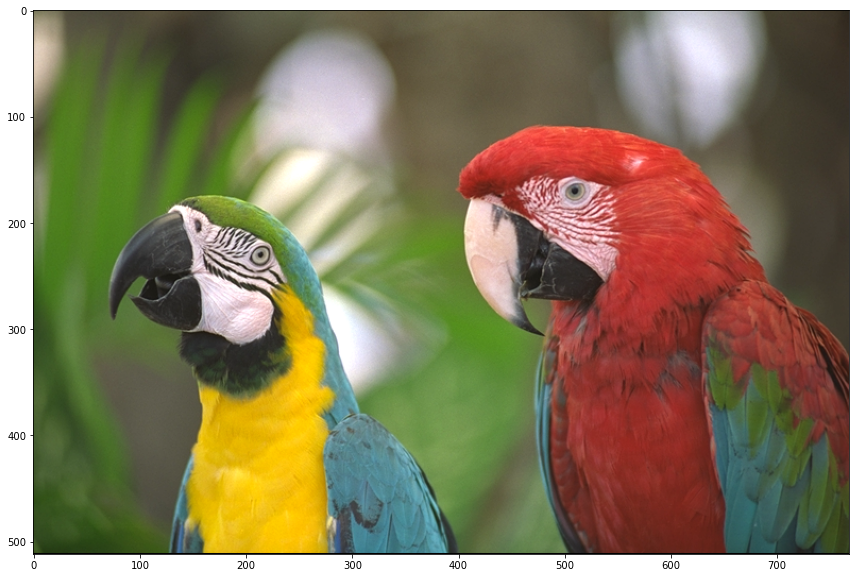

In [2]:
# Load image
img = cv2.imread('../data/kodim23.png')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot it
plt.imshow(img)

Let's start with gray tones first.

In [3]:
# Black, dark gray, light gray, white
colors = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]])

Using the colour pallette, let's quantize the original image.

In [4]:
# Cast the image to float
img = img.astype(np.float32)

# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c, :]
        
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        distances = np.sqrt(np.sum((colors-pixel)**2,axis=1))
        closest_color = np.where(distances==np.amin(distances))
        new_pixel = colors[closest_color]
        # If some pixels has two same values we will take the first one
        if new_pixel.shape[0] == 2:
            new_pixel = new_pixel[0]
        
        # Apply quantization
        quantized[r, c, :] = new_pixel
img = img.astype(np.uint8)

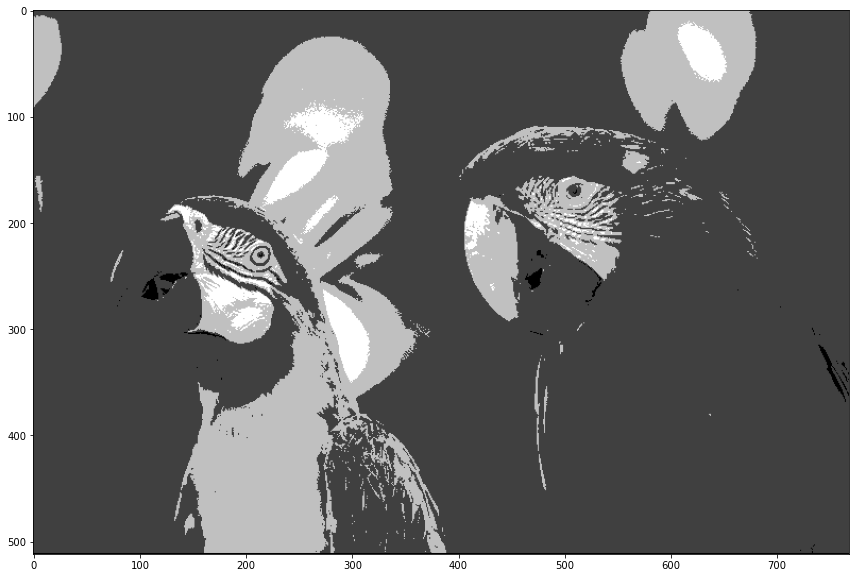

In [5]:
# Show quantized image (don't forget to cast back to uint8)
plt.imshow(quantized.astype('uint8'))

In [6]:
# Compute average quantization error
avg_quant_error = np.average(img - quantized)
print(avg_quant_error)

9.172205


#### Floyd-Steinberg Dithering
We are now going to implement the FS dithering and compare it to the optimally quantized image we have calculated above.

In [7]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img).astype(np.float32)
dithering = np.zeros_like(img)

for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img_tmp[r, c, :]
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        distances = np.sqrt(np.sum((colors-pixel)**2,axis=1))
        closest_color = np.where(distances==np.amin(distances))
        new_pixel = colors[closest_color]
        # If some pixels has two same values we will take the first one
        if new_pixel.shape[0] == 2:
            new_pixel = new_pixel[0]
        
        # Compute quantization error
        quant_error = pixel - new_pixel
        
        # Diffuse the quantization error according to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r+1, c, :] = img_tmp[r+1, c, :] + quant_error * 7/16
        img_tmp[r-1, c+1, :] = img_tmp[r-1, c+1, :] + quant_error * 3/16
        img_tmp[r, c+1, :] = img_tmp[r, c+1, :] + quant_error * 5/16
        img_tmp[r-1, c+1, :] = img_tmp[r-1, c+1, :] + quant_error * 1/16       
        
        # Apply dithering
        dithering[r, c, :] = new_pixel

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1b1571e6d00>)

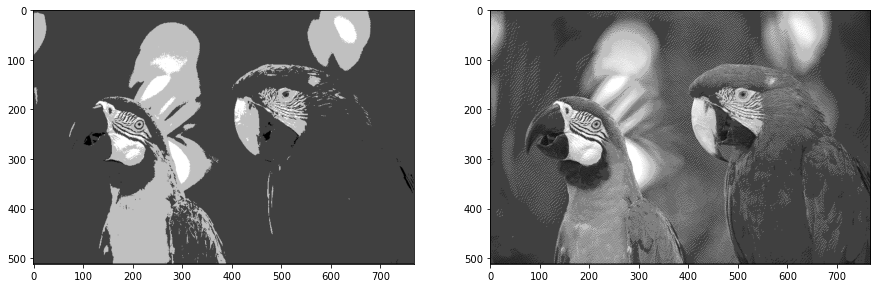

In [8]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized.astype('uint8'))   # optimally quantized
plt.subplot(122), plt.imshow(dithering.astype('uint8'))   # dithering

In [9]:
# Compute average quantization error for dithered image
avg_dith_error = np.average(img - dithering)
print(avg_dith_error)

119.52372148301866


### Questions
* Which image has higher quantization error? Optimally quantized or dithered?
  
  Dithered image has bigger quantization error

* Which image looks better to you?
   
   With Floyd-Steinberg Dithering

* Can you repeat the same process using only two colours: black and white? Show me :-)
   
   Yes, see bellow

In [10]:
colors = np.array([[0, 0, 0],
                   [255, 255, 255]])

# Cast the image to float
img = img.astype(np.float32)

# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c, :]
        
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        distances = np.sqrt(np.sum((colors-pixel)**2,axis=1))
        closest_color = np.where(distances==np.amin(distances))
        new_pixel = colors[closest_color]
        # If some pixels has two same values we will take the first one
        if new_pixel.shape[0] == 2:
            new_pixel = new_pixel[0]
        
        # Apply quantization
        quantized[r, c, :] = new_pixel
img = img.astype(np.uint8)

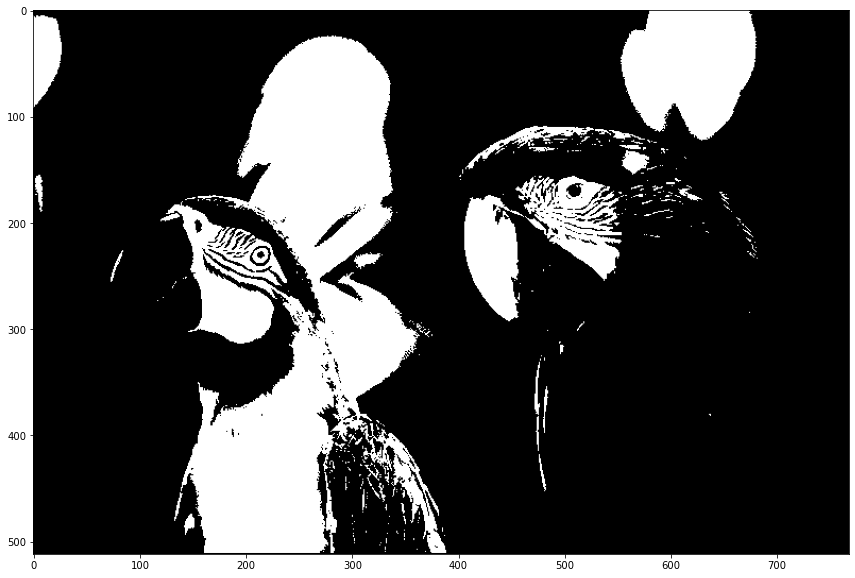

In [11]:
plt.imshow(quantized.astype('uint8'))

In [12]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img).astype(np.float32)
dithering = np.zeros_like(img)

for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img_tmp[r, c, :]
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        distances = np.sqrt(np.sum((colors-pixel)**2,axis=1))
        closest_color = np.where(distances==np.amin(distances))
        new_pixel = colors[closest_color]
        # If some pixels has two same values we will take the first one
        if new_pixel.shape[0] == 2:
            new_pixel = new_pixel[0]
        
        # Compute quantization error
        quant_error = pixel - new_pixel
        
        # Diffuse the quantization error according to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r+1, c, :] = img_tmp[r+1, c, :] + quant_error * 7/16
        img_tmp[r-1, c+1, :] = img_tmp[r-1, c+1, :] + quant_error * 3/16
        img_tmp[r, c+1, :] = img_tmp[r, c+1, :] + quant_error * 5/16
        img_tmp[r-1, c+1, :] = img_tmp[r-1, c+1, :] + quant_error * 1/16       
        
        # Apply dithering
        dithering[r, c, :] = new_pixel

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1b157994c70>)

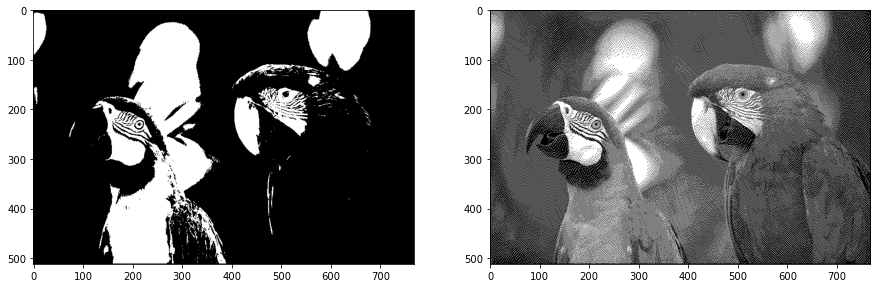

In [13]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized.astype('uint8'))   # optimally quantized
plt.subplot(122), plt.imshow(dithering.astype('uint8'))   # dithering

### Bonus Points

Repeat the homework using a diffrerent image pallette. For instance, you can use an optimal colour
pallette that we can calculate via k-means algorithm. The following snippet of code will give you the 16
optimal colours for your original image.

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=16).fit(np.reshape(img, (-1, 3)))
colors = kmeans.cluster_centers_
print(colors)

[[ 86.04842772 124.24817854  41.56415048]
 [208.15034074  69.24242963  58.96782222]
 [238.99704366 227.81890684 230.07720866]
 [235.46818204 187.9772215   11.26576512]
 [ 62.12748369  61.04459599  45.01932983]
 [169.2766321  164.20174405 155.26084139]
 [ 63.14615099  97.38276311  95.48549647]
 [153.35815459  55.28343328  48.14793422]
 [100.45187071  96.27920999  72.59609944]
 [210.22843948 194.16544947 192.55369992]
 [110.76479274 141.11095876  73.37116338]
 [135.95771961 136.72968104 112.28669069]
 [ 89.69980136 140.91152127 147.89670584]
 [113.28294957  45.44928613  37.29920772]
 [ 75.56369105  88.12688947  50.45738806]
 [ 41.41551929  38.47980305  32.06738397]]


Apply FS dithering the same way you did before.
* How does the result look like to you?
   
   More detailed image with more colors

* What happens if we use 32 colours?
 
   I see image with more colors and more beautifull for me

* And what happens if we use 256 colours?

   The same as with 32 colors

In [15]:
# Cast the image to float
img = img.astype(np.float32)

# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c, :]
        
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        distances = np.sqrt(np.sum((colors-pixel)**2,axis=1))
        closest_color = np.where(distances==np.amin(distances))
        new_pixel = colors[closest_color]
        # If some pixels has two same values we will take the first one
        if new_pixel.shape[0] == 2:
            new_pixel = new_pixel[0]
        
        # Apply quantization
        quantized[r, c, :] = new_pixel

img = img.astype(np.uint8)

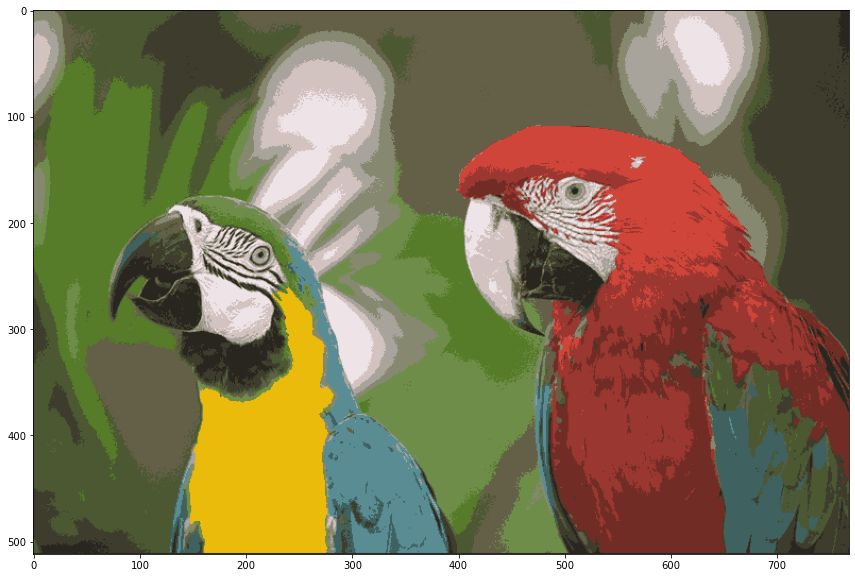

In [16]:
# Show quantized image (don't forget to cast back to uint8)

plt.imshow(quantized.astype('uint8'))

In [17]:
# Compute average quantization error
avg_quant_error = np.average(img - quantized)
print(avg_quant_error)

0.02958407


In [18]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img).astype(np.float32)
dithering = np.zeros_like(img)

for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img_tmp[r, c, :]
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        distances = np.sqrt(np.sum((colors-pixel)**2,axis=1))
        closest_color = np.where(distances==np.amin(distances))
        new_pixel = colors[closest_color]
        # If some pixels has two same values we will take the first one
        if new_pixel.shape[0] == 2:
            new_pixel = new_pixel[0]
        
        # Compute quantization error
        quant_error = pixel - new_pixel
        
        # Diffuse the quantization error according to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r+1, c, :] = img_tmp[r+1, c, :] + quant_error * 7/16
        img_tmp[r-1, c+1, :] = img_tmp[r-1, c+1, :] + quant_error * 3/16
        img_tmp[r, c+1, :] = img_tmp[r, c+1, :] + quant_error * 5/16
        img_tmp[r-1, c+1, :] = img_tmp[r-1, c+1, :] + quant_error * 1/16       
        
        # Apply dithering
        dithering[r, c, :] = new_pixel

(<AxesSubplot:title={'center':'Dithering'}>,
 Text(0.5, 1.0, 'Dithering'))

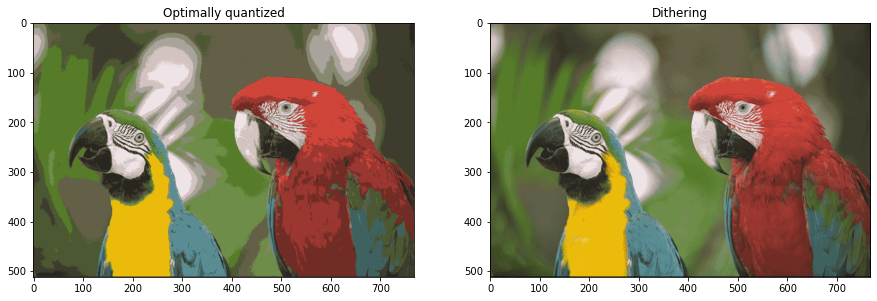

In [19]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized.astype('uint8')), plt.title('Optimally quantized')   # optimally quantized
plt.subplot(122), plt.imshow(dithering.astype('uint8')), plt.title('Dithering')   # dithering

In [20]:
# Compute average quantization error for dithered image
avg_dith_error = np.average(img - dithering)
print(avg_dith_error)

124.07371266682942


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=256).fit(np.reshape(img, (-1, 3)))
colors = kmeans.cluster_centers_
print(colors)

In [ ]:
# Cast the image to float
img = img.astype(np.float32)

# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c, :]
        
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        distances = np.sqrt(np.sum((colors-pixel)**2,axis=1))
        closest_color = np.where(distances==np.amin(distances))
        new_pixel = colors[closest_color]
        # If some pixels has two same values we will take the first one
        if new_pixel.shape[0] == 2:
            new_pixel = new_pixel[0]
        
        # Apply quantization
        quantized[r, c, :] = new_pixel
        
img = img.astype(np.uint8)

In [ ]:
# Show quantized image (don't forget to cast back to uint8)
plt.imshow(quantized.astype('uint8'))

In [ ]:
# Compute average quantization error
avg_quant_error = np.average(img - quantized)
print(avg_quant_error)

In [ ]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img).astype(np.float32)
dithering = np.zeros_like(img)

for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img_tmp[r, c, :]
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        distances = np.sqrt(np.sum((colors-pixel)**2,axis=1))
        closest_color = np.where(distances==np.amin(distances))
        new_pixel = colors[closest_color]
        # If some pixels has two same values we will take the first one
        if new_pixel.shape[0] == 2:
            new_pixel = new_pixel[0]
        
        # Compute quantization error
        quant_error = pixel - new_pixel
        
        # Diffuse the quantization error according to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r+1, c, :] = img_tmp[r+1, c, :] + quant_error * 7/16
        img_tmp[r-1, c+1, :] = img_tmp[r-1, c+1, :] + quant_error * 3/16
        img_tmp[r, c+1, :] = img_tmp[r, c+1, :] + quant_error * 5/16
        img_tmp[r-1, c+1, :] = img_tmp[r-1, c+1, :] + quant_error * 1/16       
        
        # Apply dithering
        dithering[r, c, :] = new_pixel

In [ ]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized.astype('uint8')), plt.title('Optimally quantized')   # optimally quantized
plt.subplot(122), plt.imshow(dithering.astype('uint8')), plt.title('Dithering')   # dithering

In [ ]:
# Compute average quantization error for dithered image
avg_dith_error = np.average(img - dithering)
print(avg_dith_error)